In [21]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [23]:
DIR=r"C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\Original Dataset"

In [24]:
train=pd.read_csv(r"C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\labels\train.csv")
test=pd.read_csv(r"C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\labels\test.csv")

In [25]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [26]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


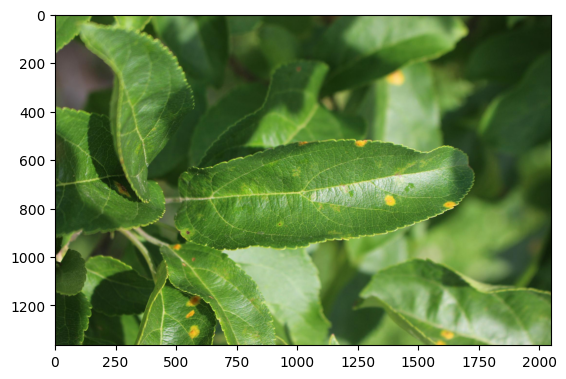

In [27]:
image1=Image.open(r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\Original Dataset\Test_0.jpg')
plt.imshow(image1)
plt.show()

# Preparing The Data

In [28]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [29]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [30]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [31]:
DIR

'C:\\Users\\HP\\Downloads\\Foliar-diseases-in-Apple-Trees-Prediction-master\\Foliar-diseases-in-Apple-Trees-Prediction-master\\images\\Original Dataset'

In [32]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [33]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [34]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train\healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train\multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train\rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train\scab')
                
        elif search("Test",img):
            shutil.copy(path,r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\test')

In [35]:
train_dir=create_train_data()

100%|████████████████████████████████████████████████████████████████████████████████████| 3642/3642 [00:26<00:00, 138.32it/s]


# Data Preprocessing

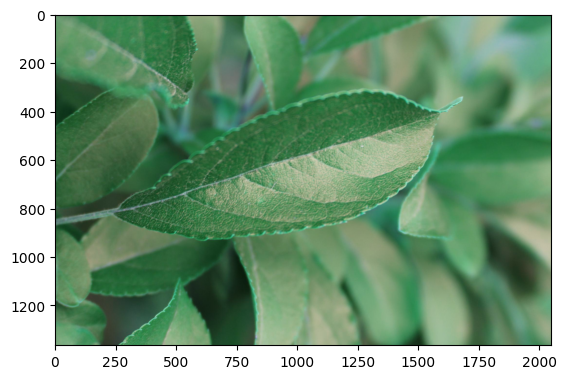

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\HP\\Downloads\\Foliar-diseases-in-Apple-Trees-Prediction-master\\Foliar-diseases-in-Apple-Trees-Prediction-master\\images\\train\\multiple_disease'

In [127]:
Train_DIR=r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train'
Categories=['healthy','multiple_disease','rust','scab']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    

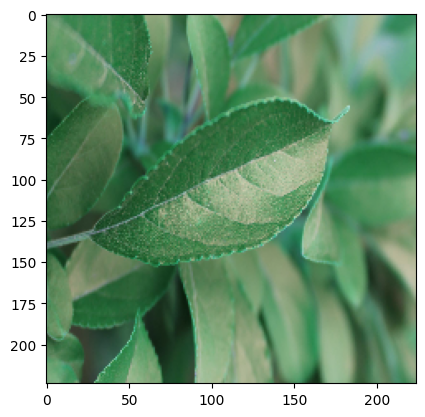

In [37]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Prepration

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequent
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [39]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')


Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [40]:
#4 layer CNN
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)      

In [22]:
#model training
#CNN

model_history = model.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=30,
    steps_per_epoch=train_datagen.samples//16,
    validation_steps=val_datagen.samples//16,
    callbacks=callbacks
)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2622 - accuracy: 0.3356
Epoch 1: val_loss improved from inf to 1.24244, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 98s 1s/step - loss: 1.2622 - accuracy: 0.3356 - val_loss: 1.2424 - val_accuracy: 0.3182
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2461 - accuracy: 0.3454
Epoch 2: val_loss did not improve from 1.24244
91/91 [==============================] - 74s 814ms/step - loss: 1.2461 - accuracy: 0.3454 - val_loss: 1.2425 - val_accuracy: 0.3409
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2375 - accuracy: 0.3551
Epoch 3: val_loss did not improve from 1.24244
91/91 [==============================] - 74s 817ms/step - loss: 1.2375 - accuracy: 0.3551 - val_loss: 1.2483 - val_accuracy: 0.3523
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 1.1893 - accuracy: 0.4348
Epoch 4: val_loss did not improve from 1.24244
91/91 [==============================] - 75s 820ms/step - loss: 1.1893 - accuracy: 0.4348 - val_loss: 1.2601 - val_accuracy: 0.4205
Epoch 5/30
91/91 [==============================] - 

INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 73s 804ms/step - loss: 0.9469 - accuracy: 0.5964 - val_loss: 0.8087 - val_accuracy: 0.6335
Epoch 6/30
91/91 [==============================] - ETA: 0s - loss: 0.7733 - accuracy: 0.6685
Epoch 6: val_loss improved from 0.80871 to 0.67826, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 78s 851ms/step - loss: 0.7733 - accuracy: 0.6685 - val_loss: 0.6783 - val_accuracy: 0.7273
Epoch 7/30
91/91 [==============================] - ETA: 0s - loss: 0.7060 - accuracy: 0.7067
Epoch 7: val_loss improved from 0.67826 to 0.64863, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 85s 938ms/step - loss: 0.7060 - accuracy: 0.7067 - val_loss: 0.6486 - val_accuracy: 0.7472
Epoch 8/30
91/91 [==============================] - ETA: 0s - loss: 0.6734 - accuracy: 0.7295
Epoch 8: val_loss did not improve from 0.64863
91/91 [==============================] - 80s 877ms/step - loss: 0.6734 - accuracy: 0.7295 - val_loss: 0.6848 - val_accuracy: 0.7386
Epoch 9/30
91/91 [==============================] - ETA: 0s - loss: 0.6239 - accuracy: 0.7628
Epoch 9: val_loss improved from 0.64863 to 0.57195, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 77s 845ms/step - loss: 0.6239 - accuracy: 0.7628 - val_loss: 0.5720 - val_accuracy: 0.7955
Epoch 10/30
91/91 [==============================] - ETA: 0s - loss: 0.6092 - accuracy: 0.7580
Epoch 10: val_loss did not improve from 0.57195
91/91 [==============================] - 80s 881ms/step - loss: 0.6092 - accuracy: 0.7580 - val_loss: 0.6220 - val_accuracy: 0.7528
Epoch 11/30
91/91 [==============================] - ETA: 0s - loss: 0.5535 - accuracy: 0.7961
Epoch 11: val_loss improved from 0.57195 to 0.49885, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 84s 920ms/step - loss: 0.5535 - accuracy: 0.7961 - val_loss: 0.4988 - val_accuracy: 0.8097
Epoch 12/30
91/91 [==============================] - ETA: 0s - loss: 0.5002 - accuracy: 0.8051
Epoch 12: val_loss improved from 0.49885 to 0.48877, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 76s 838ms/step - loss: 0.5002 - accuracy: 0.8051 - val_loss: 0.4888 - val_accuracy: 0.7926
Epoch 13/30
91/91 [==============================] - ETA: 0s - loss: 0.4980 - accuracy: 0.8308
Epoch 13: val_loss did not improve from 0.48877
91/91 [==============================] - 74s 812ms/step - loss: 0.4980 - accuracy: 0.8308 - val_loss: 0.5203 - val_accuracy: 0.8324
Epoch 14/30
91/91 [==============================] - ETA: 0s - loss: 0.4323 - accuracy: 0.8460
Epoch 14: val_loss improved from 0.48877 to 0.37808, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 82s 913ms/step - loss: 0.4323 - accuracy: 0.8460 - val_loss: 0.3781 - val_accuracy: 0.8807
Epoch 15/30
91/91 [==============================] - ETA: 0s - loss: 0.4178 - accuracy: 0.8488
Epoch 15: val_loss improved from 0.37808 to 0.35978, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 87s 959ms/step - loss: 0.4178 - accuracy: 0.8488 - val_loss: 0.3598 - val_accuracy: 0.9091
Epoch 16/30
91/91 [==============================] - ETA: 0s - loss: 0.3952 - accuracy: 0.8662
Epoch 16: val_loss improved from 0.35978 to 0.35591, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 84s 927ms/step - loss: 0.3952 - accuracy: 0.8662 - val_loss: 0.3559 - val_accuracy: 0.8835
Epoch 17/30
91/91 [==============================] - ETA: 0s - loss: 0.3374 - accuracy: 0.8856
Epoch 17: val_loss improved from 0.35591 to 0.32660, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 79s 872ms/step - loss: 0.3374 - accuracy: 0.8856 - val_loss: 0.3266 - val_accuracy: 0.8920
Epoch 18/30
91/91 [==============================] - ETA: 0s - loss: 0.3224 - accuracy: 0.8897
Epoch 18: val_loss improved from 0.32660 to 0.30751, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 82s 896ms/step - loss: 0.3224 - accuracy: 0.8897 - val_loss: 0.3075 - val_accuracy: 0.8920
Epoch 19/30
91/91 [==============================] - ETA: 0s - loss: 0.3056 - accuracy: 0.8953
Epoch 19: val_loss improved from 0.30751 to 0.30627, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 87s 958ms/step - loss: 0.3056 - accuracy: 0.8953 - val_loss: 0.3063 - val_accuracy: 0.8949
Epoch 20/30
91/91 [==============================] - ETA: 0s - loss: 0.3098 - accuracy: 0.8946
Epoch 20: val_loss did not improve from 0.30627
91/91 [==============================] - 79s 871ms/step - loss: 0.3098 - accuracy: 0.8946 - val_loss: 0.3212 - val_accuracy: 0.8949
Epoch 21/30
91/91 [==============================] - ETA: 0s - loss: 0.2925 - accuracy: 0.9008
Epoch 21: val_loss did not improve from 0.30627
91/91 [==============================] - 87s 959ms/step - loss: 0.2925 - accuracy: 0.9008 - val_loss: 0.3310 - val_accuracy: 0.8949
Epoch 22/30
91/91 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.9071
Epoch 22: val_loss improved from 0.30627 to 0.26745, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 101s 1s/step - loss: 0.2637 - accuracy: 0.9071 - val_loss: 0.2674 - val_accuracy: 0.9148
Epoch 23/30
91/91 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.9133
Epoch 23: val_loss did not improve from 0.26745
91/91 [==============================] - 95s 1s/step - loss: 0.2526 - accuracy: 0.9133 - val_loss: 0.3469 - val_accuracy: 0.8920
Epoch 24/30
91/91 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.8918
Epoch 24: val_loss improved from 0.26745 to 0.23041, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 100s 1s/step - loss: 0.2826 - accuracy: 0.8918 - val_loss: 0.2304 - val_accuracy: 0.9290
Epoch 25/30
91/91 [==============================] - ETA: 0s - loss: 0.2661 - accuracy: 0.9133
Epoch 25: val_loss did not improve from 0.23041
91/91 [==============================] - 85s 933ms/step - loss: 0.2661 - accuracy: 0.9133 - val_loss: 0.2767 - val_accuracy: 0.8892
Epoch 26/30
91/91 [==============================] - ETA: 0s - loss: 0.2306 - accuracy: 0.9202
Epoch 26: val_loss improved from 0.23041 to 0.23018, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 81s 885ms/step - loss: 0.2306 - accuracy: 0.9202 - val_loss: 0.2302 - val_accuracy: 0.9261
Epoch 27/30
91/91 [==============================] - ETA: 0s - loss: 0.2137 - accuracy: 0.9272
Epoch 27: val_loss did not improve from 0.23018
91/91 [==============================] - 90s 987ms/step - loss: 0.2137 - accuracy: 0.9272 - val_loss: 0.2375 - val_accuracy: 0.9347
Epoch 28/30
91/91 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9300
Epoch 28: val_loss did not improve from 0.23018
91/91 [==============================] - 77s 843ms/step - loss: 0.2165 - accuracy: 0.9300 - val_loss: 0.2375 - val_accuracy: 0.9176
Epoch 29/30
91/91 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9286
Epoch 29: val_loss did not improve from 0.23018
91/91 [==============================] - 80s 883ms/step - loss: 0.2036 - accuracy: 0.9286 - val_loss: 0.2804 - val_accuracy: 0.9062
Epoch 30/30
91/91 [========================

INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 84s 928ms/step - loss: 0.2073 - accuracy: 0.9265 - val_loss: 0.2045 - val_accuracy: 0.9290


In [114]:
#8 layer CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model3 = Sequential()

# Add the first convolutional layer with 64 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))

# Add the first max pooling layer with pool size (2,2)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer with 64 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add the second max pooling layer with pool size (2,2)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with 64 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add the third max pooling layer with pool size (2,2)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fourth convolutional layer with 64 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add the fourth max pooling layer with pool size (2,2)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fifth convolutional layer with 128 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add the fifth max pooling layer with pool size (2,2)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add the sixth convolutional layer with 128 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add the sixth max pooling layer with pool size (2,2)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add the seventh convolutional layer with 128 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add the seventh max pooling layer with pool size (2,2)
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add the eighth convolutional layer with 128 filters, a kernel size of (3,3), 'relu' activation, and 'same' padding
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))




# Flatten the output of the previous layer
model3.add(Flatten())

# Add a dense layer with 4 units and 'softmax' activation
model3.add(Dense(4, activation='softmax'))

# Compile the Model
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model3.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 28, 28, 64)     

In [120]:
model3_history=model3.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=30,
    steps_per_epoch=train_datagen.samples//16,
    validation_steps=val_datagen.samples//16,
    callbacks=callbacks
)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.2463 - accuracy: 0.3204
Epoch 1: val_loss did not improve from 0.40478
91/91 [==============================] - 179s 2s/step - loss: 1.2463 - accuracy: 0.3204 - val_loss: 1.2383 - val_accuracy: 0.3409
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 1.2475 - accuracy: 0.3317
Epoch 2: val_loss did not improve from 0.40478
91/91 [==============================] - 194s 2s/step - loss: 1.2475 - accuracy: 0.3317 - val_loss: 1.2409 - val_accuracy: 0.3466
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 1.2439 - accuracy: 0.3405
Epoch 3: val_loss did not improve from 0.40478
91/91 [==============================] - 191s 2s/step - loss: 1.2439 - accuracy: 0.3405 - val_loss: 1.2476 - val_accuracy: 0.3381
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 1.2423 - accuracy: 0.3336
Epoch 4: val_loss did not improve from 0.40478
91/91 [==============================] - 196s 

In [113]:
#MOBILENETV2

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the MobileNetV2 model (pre-trained on ImageNet)
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model layers
base_model.trainable = False

# Create a new model
model2 = Sequential()

# Add the MobileNetV2 base model to the new model
model2.add(base_model)

# Add a global average pooling layer
model2.add(GlobalAveragePooling2D())

# Add a dense layer with 4 units and 'softmax' activation
model2.add(Dense(4, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model2.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [107]:
model2_history=model2.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=30,
    steps_per_epoch=train_datagen.samples//16,
    validation_steps=val_datagen.samples//16,
    callbacks=callbacks
)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 0.8573 - accuracy: 0.6803
Epoch 1: val_loss improved from 1.24224 to 0.65798, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 69s 740ms/step - loss: 0.8573 - accuracy: 0.6803 - val_loss: 0.6580 - val_accuracy: 0.7756
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 0.6011 - accuracy: 0.8003
Epoch 2: val_loss improved from 0.65798 to 0.55488, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 65s 717ms/step - loss: 0.6011 - accuracy: 0.8003 - val_loss: 0.5549 - val_accuracy: 0.8125
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 0.5305 - accuracy: 0.8155
Epoch 3: val_loss improved from 0.55488 to 0.53659, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 66s 735ms/step - loss: 0.5305 - accuracy: 0.8155 - val_loss: 0.5366 - val_accuracy: 0.8210
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 0.4688 - accuracy: 0.8460
Epoch 4: val_loss improved from 0.53659 to 0.53401, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 67s 734ms/step - loss: 0.4688 - accuracy: 0.8460 - val_loss: 0.5340 - val_accuracy: 0.8295
Epoch 5/30
91/91 [==============================] - ETA: 0s - loss: 0.4549 - accuracy: 0.8379
Epoch 5: val_loss improved from 0.53401 to 0.49634, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 75s 821ms/step - loss: 0.4549 - accuracy: 0.8379 - val_loss: 0.4963 - val_accuracy: 0.8267
Epoch 6/30
91/91 [==============================] - ETA: 0s - loss: 0.4068 - accuracy: 0.8620
Epoch 6: val_loss did not improve from 0.49634
91/91 [==============================] - 51s 557ms/step - loss: 0.4068 - accuracy: 0.8620 - val_loss: 0.5064 - val_accuracy: 0.8267
Epoch 7/30
91/91 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.8592
Epoch 7: val_loss improved from 0.49634 to 0.47820, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 70s 774ms/step - loss: 0.4134 - accuracy: 0.8592 - val_loss: 0.4782 - val_accuracy: 0.8438
Epoch 8/30
91/91 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8558
Epoch 8: val_loss did not improve from 0.47820
91/91 [==============================] - 53s 578ms/step - loss: 0.4052 - accuracy: 0.8558 - val_loss: 0.5133 - val_accuracy: 0.8182
Epoch 9/30
91/91 [==============================] - ETA: 0s - loss: 0.3913 - accuracy: 0.8634
Epoch 9: val_loss improved from 0.47820 to 0.42489, saving model to C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 68s 749ms/step - loss: 0.3913 - accuracy: 0.8634 - val_loss: 0.4249 - val_accuracy: 0.8580
Epoch 10/30
91/91 [==============================] - ETA: 0s - loss: 0.3962 - accuracy: 0.8551
Epoch 10: val_loss did not improve from 0.42489
91/91 [==============================] - 49s 542ms/step - loss: 0.3962 - accuracy: 0.8551 - val_loss: 0.4303 - val_accuracy: 0.8608
Epoch 11/30
91/91 [==============================] - ETA: 0s - loss: 0.3660 - accuracy: 0.8648
Epoch 11: val_loss did not improve from 0.42489
91/91 [==============================] - 54s 589ms/step - loss: 0.3660 - accuracy: 0.8648 - val_loss: 0.4592 - val_accuracy: 0.8409
Epoch 12/30
91/91 [==============================] - ETA: 0s - loss: 0.3364 - accuracy: 0.8807
Epoch 12: val_loss did not improve from 0.42489
91/91 [==============================] - 54s 592ms/step - loss: 0.3364 - accuracy: 0.8807 - val_loss: 0.4754 - val_accuracy: 0.8324
Epoch 13/30
91/91 [========================

INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\models\apple2.h\assets


91/91 [==============================] - 67s 734ms/step - loss: 0.3167 - accuracy: 0.8897 - val_loss: 0.4048 - val_accuracy: 0.8580
Epoch 18/30
91/91 [==============================] - ETA: 0s - loss: 0.2914 - accuracy: 0.8960
Epoch 18: val_loss did not improve from 0.40478
91/91 [==============================] - 51s 564ms/step - loss: 0.2914 - accuracy: 0.8960 - val_loss: 0.5060 - val_accuracy: 0.8068
Epoch 19/30
91/91 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.8828
Epoch 19: val_loss did not improve from 0.40478
91/91 [==============================] - 52s 567ms/step - loss: 0.3212 - accuracy: 0.8828 - val_loss: 0.4100 - val_accuracy: 0.8438
Epoch 20/30
91/91 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.9043
Epoch 20: val_loss did not improve from 0.40478
91/91 [==============================] - 51s 555ms/step - loss: 0.2876 - accuracy: 0.9043 - val_loss: 0.4724 - val_accuracy: 0.8352
Epoch 21/30
91/91 [========================

In [121]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model and add the VGG base
model4 = Sequential()
model4.add(vgg_base)

# Add custom layers on top of the VGG base
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(4, activation='softmax'))  # Replace `num_classes` with the number of plant disease classes

# Compile the model
model4.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model4.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               6422784   
                                                                 
 dense_15 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


In [122]:
model4_history=model4.fit(
    train_datagen,
    validation_data=val_datagen,
    epochs=30,
    steps_per_epoch=train_datagen.samples//16,
    validation_steps=val_datagen.samples//16,
    callbacks=callbacks
)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 1.8140 - accuracy: 0.4501
Epoch 1: val_loss did not improve from 0.40478
91/91 [==============================] - 417s 5s/step - loss: 1.8140 - accuracy: 0.4501 - val_loss: 1.0517 - val_accuracy: 0.5795
Epoch 2/30
91/91 [==============================] - ETA: 0s - loss: 0.9543 - accuracy: 0.6012
Epoch 2: val_loss did not improve from 0.40478
91/91 [==============================] - 422s 5s/step - loss: 0.9543 - accuracy: 0.6012 - val_loss: 0.9569 - val_accuracy: 0.6136
Epoch 3/30
91/91 [==============================] - ETA: 0s - loss: 0.8556 - accuracy: 0.6637
Epoch 3: val_loss did not improve from 0.40478
91/91 [==============================] - 418s 5s/step - loss: 0.8556 - accuracy: 0.6637 - val_loss: 0.8575 - val_accuracy: 0.6562
Epoch 4/30
91/91 [==============================] - ETA: 0s - loss: 0.7692 - accuracy: 0.7011
Epoch 4: val_loss did not improve from 0.40478
91/91 [==============================] - 433s 

In [42]:
val_predictions = model.predict(val_datagen)
print(val_predictions)

23/23 [==============================] - 11s 442ms/step
[[0.25475228 0.25821358 0.24628624 0.24074788]
 [0.26220098 0.2535547  0.24665049 0.23759381]
 [0.24374379 0.25399286 0.2593037  0.24295957]
 ...
 [0.25002944 0.25179344 0.25759894 0.24057823]
 [0.2553769  0.26165885 0.25627187 0.22669235]
 [0.25954542 0.254187   0.25082844 0.23543917]]


In [55]:
val_predicted_labels = np.argmax(val_predictions, axis=1)
val_predicted_labels

array([1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1,
       2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1,
       1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1,
       2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0,

In [54]:
val_true_labels = val_datagen.classes
val_true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

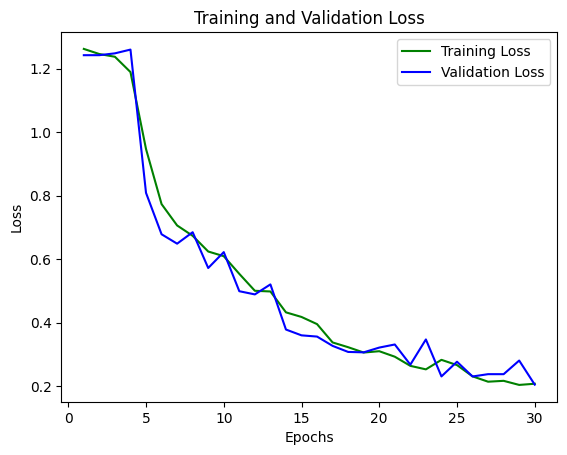

In [25]:
import matplotlib.pyplot as plt

loss_train = model_history.history['loss']
loss_val = model_history.history['val_loss']
epochs = range(1, 31)

plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


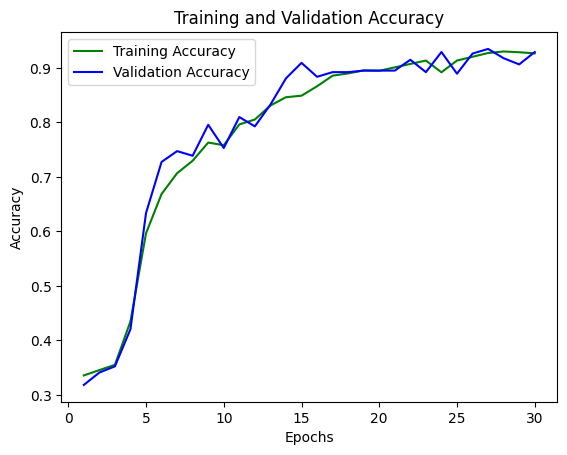

In [33]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 [==============================] - 0s 500ms/step
2


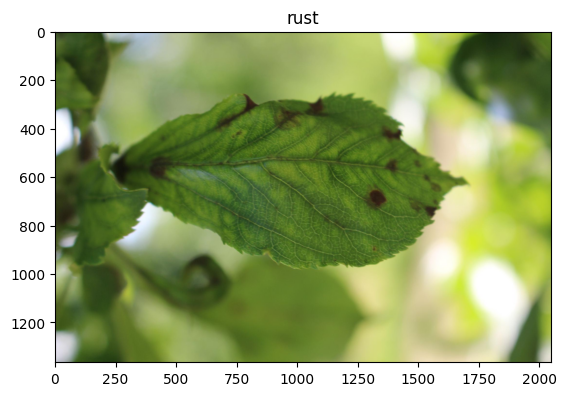

In [23]:
test_image=r"C:\Users\HP\Downloads\Foliar-diseases-in-Apple-Trees-Prediction-master\Foliar-diseases-in-Apple-Trees-Prediction-master\images\train\scab\Train_1758.jpg"
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [28]:
model.save("apple23.h5")

In [119]:
model2.save("apple24.h5")
import os
print(os.getcwd())

C:\Users\HP
